## 5.6 深度卷积神经网络（AlexNet）

* LeNet 在较小数据集上可以取得较好成绩，但是在更大真实数据集上表现并不尽人意。


In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from livelossplot.tf_keras import PlotLossesCallback
from  skimage import transform
import numpy as np

In [2]:
model = keras.Sequential([
    keras.layers.Lambda(lambda img: tf.image.resize(img, (224, 224)), input_shape=(28, 28, 1)),
    keras.layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(224, 224, 1)),
    keras.layers.MaxPool2D(3, strides=2),
    keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
    keras.layers.MaxPool2D(3, strides=2),
    keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(3, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

W1019 17:21:18.595319 140573928220480 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 54, 54, 96)        11712     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 384)       1

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
#x_train = np.asarray([transform.resize(image, (224, 224)) for image in x_train])
x_train = x_train / 255.

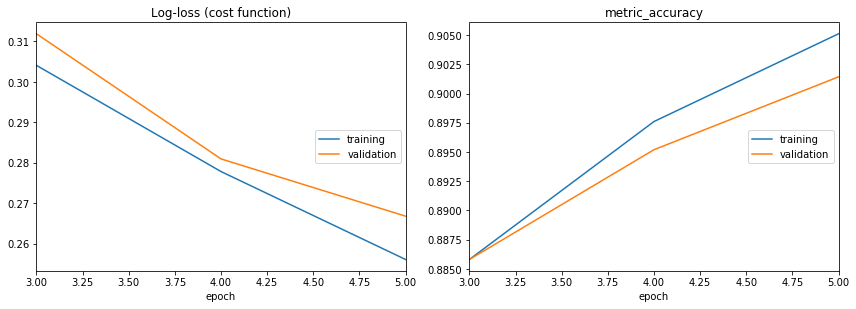

Log-loss (cost function):
training   (min:    0.256, max:    0.678, cur:    0.256)
validation (min:    0.267, max:    0.388, cur:    0.267)

metric_accuracy:
training   (min:    0.743, max:    0.905, cur:    0.905)
validation (min:    0.858, max:    0.901, cur:    0.901)
36000/36000 [==============================] - 12s 343us/sample - loss: 0.2561 - metric_accuracy: 0.9051 - val_loss: 0.2668 - val_metric_accuracy: 0.9014


In [4]:
def metric_accuracy(y_true, y_pred):
    ytrue = K.flatten(y_true)
    ypred = K.cast(K.argmax(y_pred, axis=-1), K.floatx())
    acc = K.equal(ytrue, ypred)
    return K.mean(acc)

model.compile(optimizer='adam', 
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=[metric_accuracy])

model.fit(
    x_train.reshape((x_train.shape[0], 28, 28, 1)), 
    y_train, epochs=5, batch_size=128, validation_split=0.4,
    callbacks=[PlotLossesCallback()])